In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
import random
import matplotlib.pyplot as plt
import lightgbm as lgb
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import plotly.figure_factory as ff
import plotly.offline as py #visualization
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso, ElasticNet
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation, Dropout
import gc

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
!unzip /content/drive/My\ Drive/santander-customer-transaction-prediction.zip

Archive:  /content/drive/My Drive/santander-customer-transaction-prediction.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [9]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')
df = pd.concat([train,test])
df = df.reset_index()
del df['index']

In [10]:
train_copy = train.copy()
test_copy = test.copy()
train_y = train_copy['target'].values
train_X_column_name = train_copy.drop(['target', 'ID_code'], axis=1).columns
train_X = train_copy.drop(['target', 'ID_code'], axis=1).values
test_X = test_copy.drop(['ID_code'], axis=1).values
train_X_copy = train_X.copy()
test_X_copy = test_X.copy()

In [11]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [12]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,...,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,...,30.9641,5.6723,3.6873,13.0429,-10.6572,15.5134,3.2185,9.0535,7.0535,5.3924,-0.7720,-8.1783,29.9227,-5.6274,10.5018,9.6083,-0.4935,8.1696,-4.3605,5.2110,0.4087,12.0030,-10.3812,5.8496,25.1958,-8.8468,11.8263,-8.7112,15.9072,0.9812,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,-4.7057,-3.0422,13.6751,3.8183,10.8535,14.2126,9.8837,2.6541,21.2181,20.8163,12.4666,12.3696,4.7473,2.7936,5.2189,13.5670,-15.4246,-0.1655,7.2633,3.4310,-9.1508,9.7320,3.1062,22.3076,11.9593,9.9255,4.0702,4.9934,8.0667,...,39.3654,5.5228,3.3159,4.3324,-0.5382,13.3009,3.1243,-4.1731,1.2330,6.1513,-0.0391,1.4950,16.8874,-2.9787,27.4035,15.8819,-10.9660,15.6415,-9.4056,4.4611,-3.0835,8.5549,-2.8517,13.4770,24.4721,-3.4824,4.9178,-2.0720,11.5390,1.1821,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,0.0095,-5.0659,14.0526,13.5010,8.7660,14.7352,10.0383,-15.3508,2.1273,21.4797,14.5372,12.5527,2.9707,4.2398,13.7796,14.1408,1.0061,-1.3479,5.2570,6.5911,6.2161,9.5540,2.3628,10.2124,10.8047,-2.5588,6.0720,3.2613,16.5632,...,19.7251,5.3882,3.6775,7.4753,-11.0780,24.8712,2.6415,2.2673,7.2788,5.6406,7.2048,3.4504,2.4130,11.1674,14.5499,10.6151,-5.7922,13.9407,7.1078,1.1019,9.4590,9.8243,5.9917,5.1634,8.1154,3.6638,3.3102,-19.7819,13.4499,1.3104,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,5.1025,-3.2827,14.1013,8.9672,4.7276,14.5811,11.8615,3.1480,18.0126,13.8006,1.6026,16.3059,6.7954,3.6015,13.6569,13.8807,8.6228,-2.2654,5.2255,7.0165,-15.6961,10.6239,-4.7674,17.5447,11.8668,3.0154,4.2546,6.7601,5.9613,...,22.8700,5.6688,6.1159,13.2433,-11.9785,26.2040,3.2348,-5.5775,5.7036,6.1717,-1.6039,-2.4866,17.2728,2.3640,14.0037,12.9165,-12.0311,10.1161,-8.7562,6.0889,-1.3620,10.3559,-7.4915,9.4588,3.9829,5.8580,8.3635,-24.8254,11.4928,1.6321,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [13]:
# Rows and Columns
print('Train -->',train.shape)
print('Test -->',test.shape)

Train --> (200000, 202)
Test --> (200000, 201)


## Visualizing the distribution of variables

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



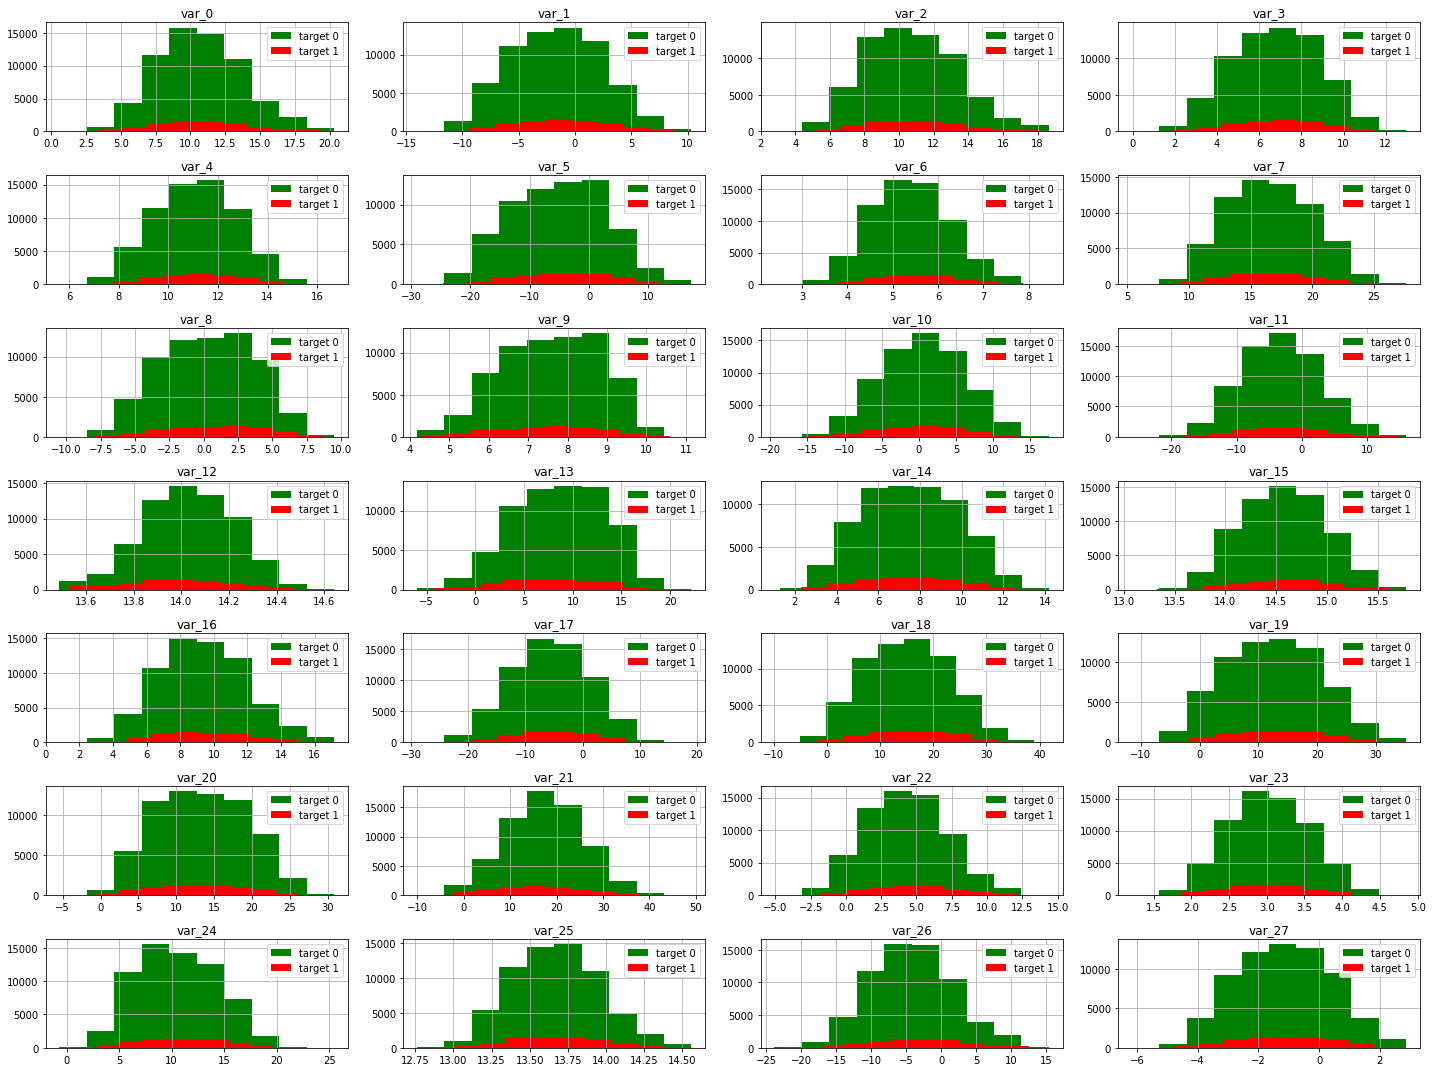

In [ ]:
#Checking distribution of the variables
#Subsetting train dataset to visualize distribution of 1s and 0s
t0=train[train['target']==0]
t1=train[train['target']==1]

#Plotting distribution
plt.figure(figsize=(20,15))
for i, col in enumerate(list(train.columns)[2:30]):
    plt.subplot(7,4,i + 1)
    plt.hist(t0[col],label='target 0',color='green')
    plt.hist(t1[col],label='target 1',color='red')
    plt.title(col)
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



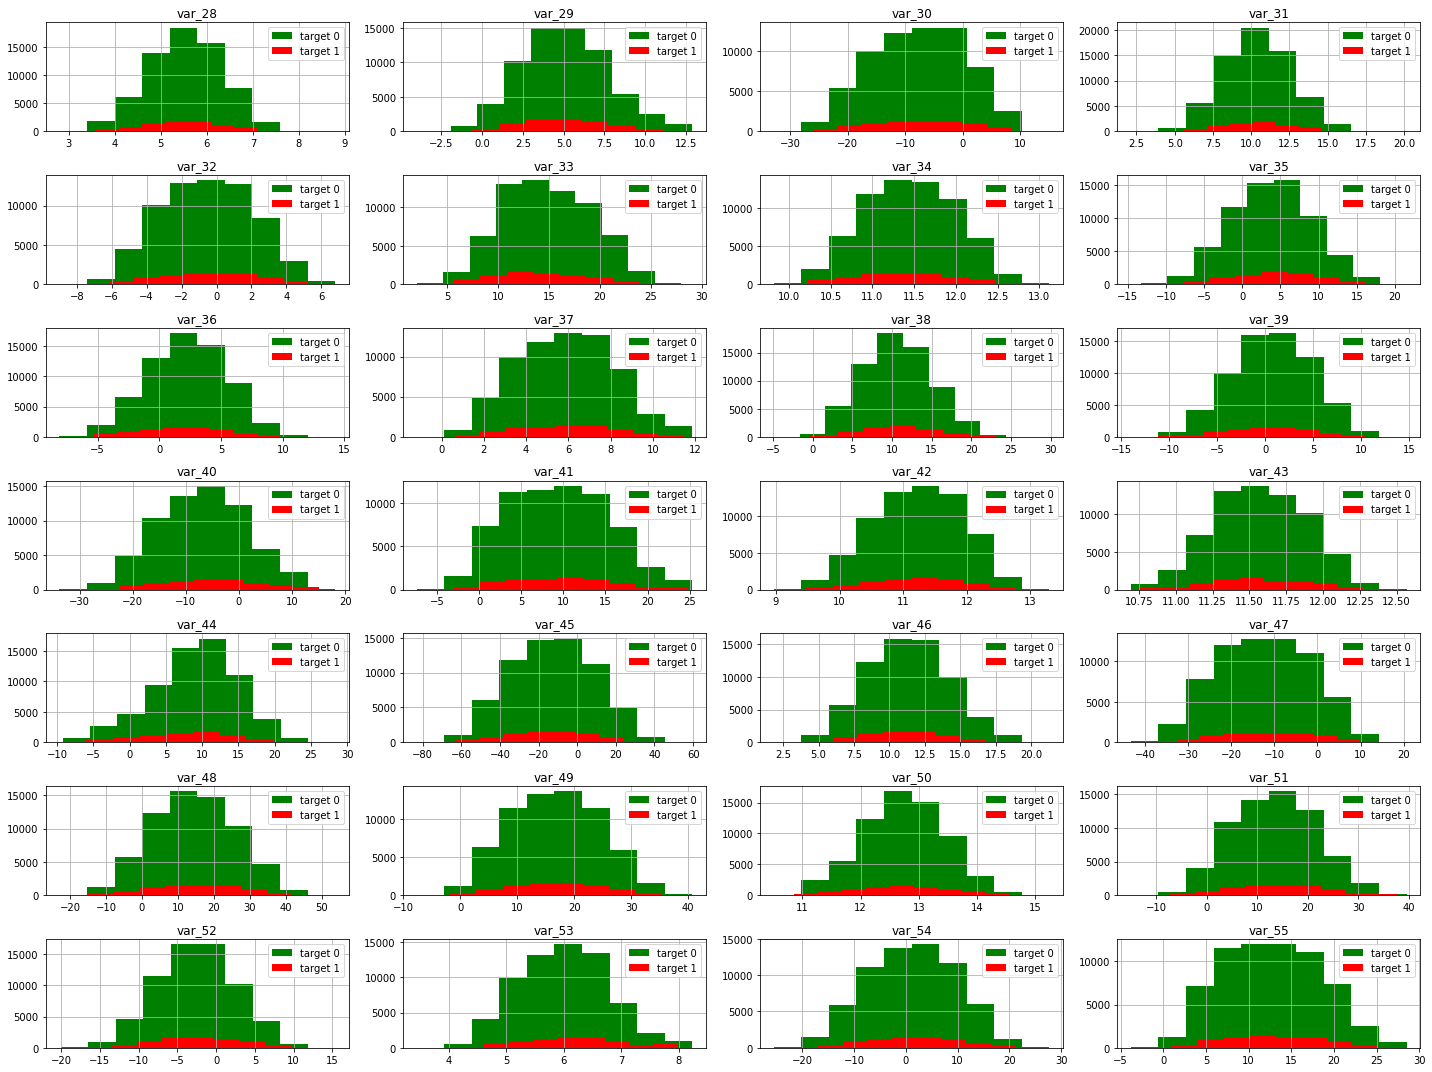

In [ ]:
plt.figure(figsize=(20,15))
for i, col in enumerate(list(train.columns)[30:58]):
    plt.subplot(7,4,i + 1)
    plt.hist(t0[col],label='target 0',color='green')
    plt.hist(t1[col],label='target 1',color='red')
    plt.title(col)
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



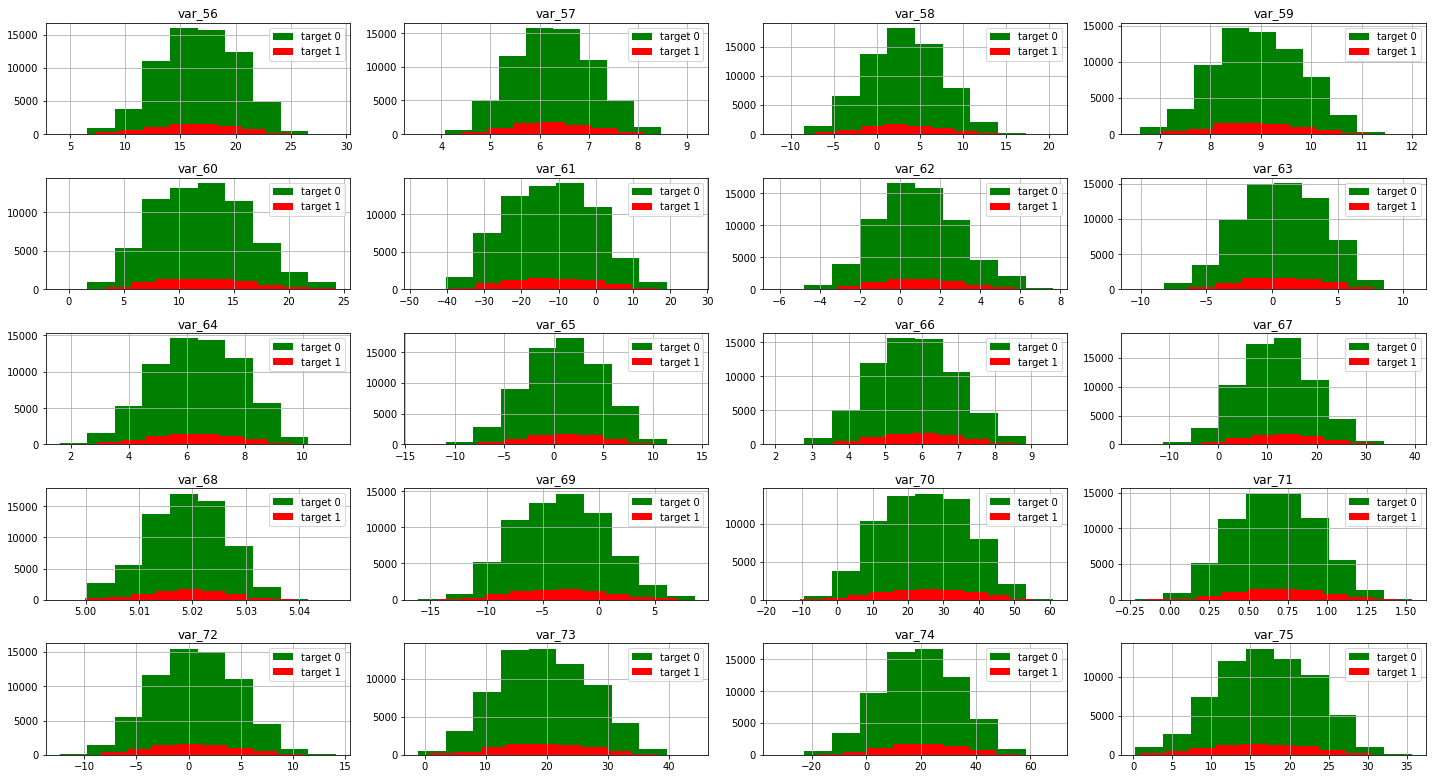

In [ ]:
plt.figure(figsize=(20,15))
for i, col in enumerate(list(train.columns)[58:78]):
    plt.subplot(7,4,i + 1)
    plt.hist(t0[col],label='target 0',color='green')
    plt.hist(t1[col],label='target 1',color='red')
    plt.title(col)
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



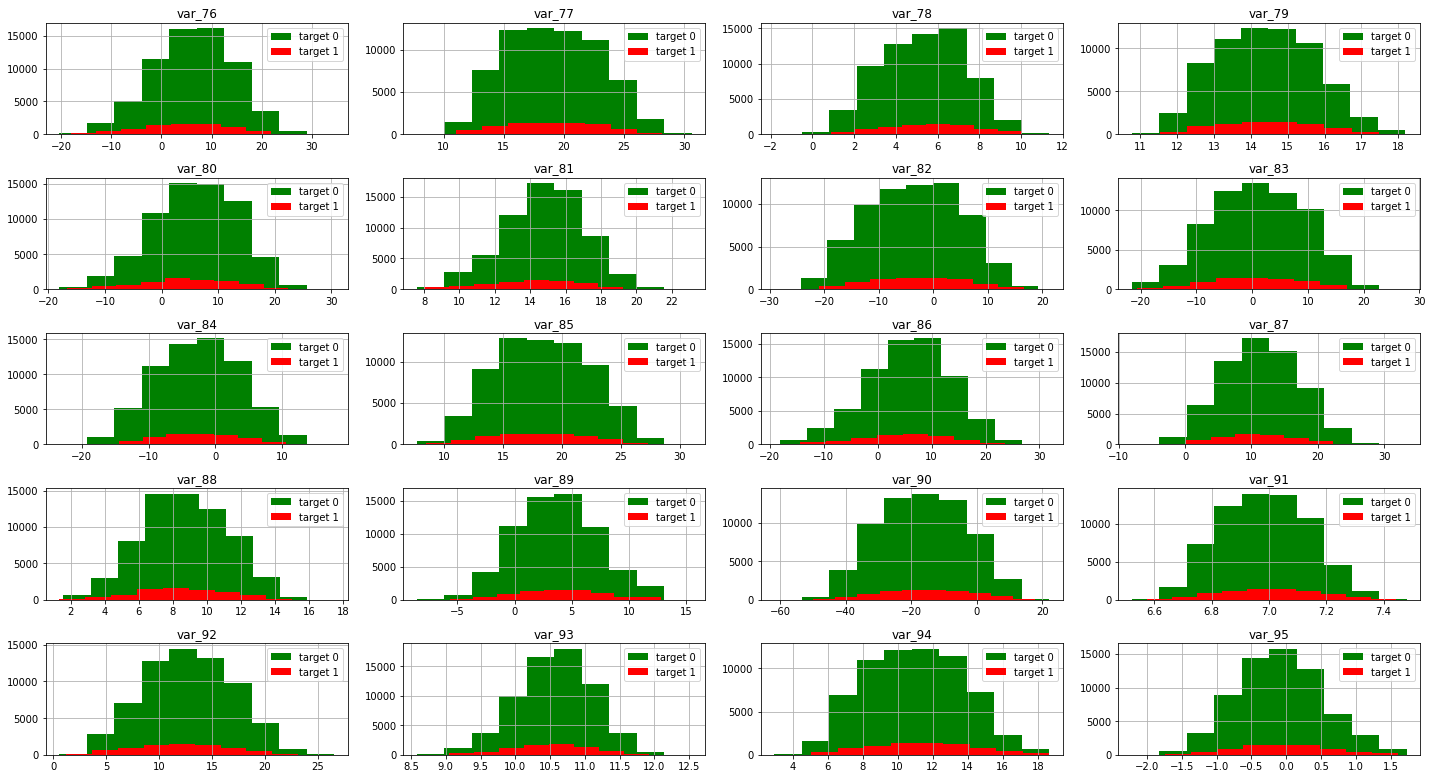

In [ ]:
#Variables 76 to 95
plt.figure(figsize=(20,15))
for i, col in enumerate(list(train.columns)[78:98]):
    plt.subplot(7,4,i + 1)
    plt.hist(t0[col],label='target 0',color='green')
    plt.hist(t1[col],label='target 1',color='red')
    plt.title(col)
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



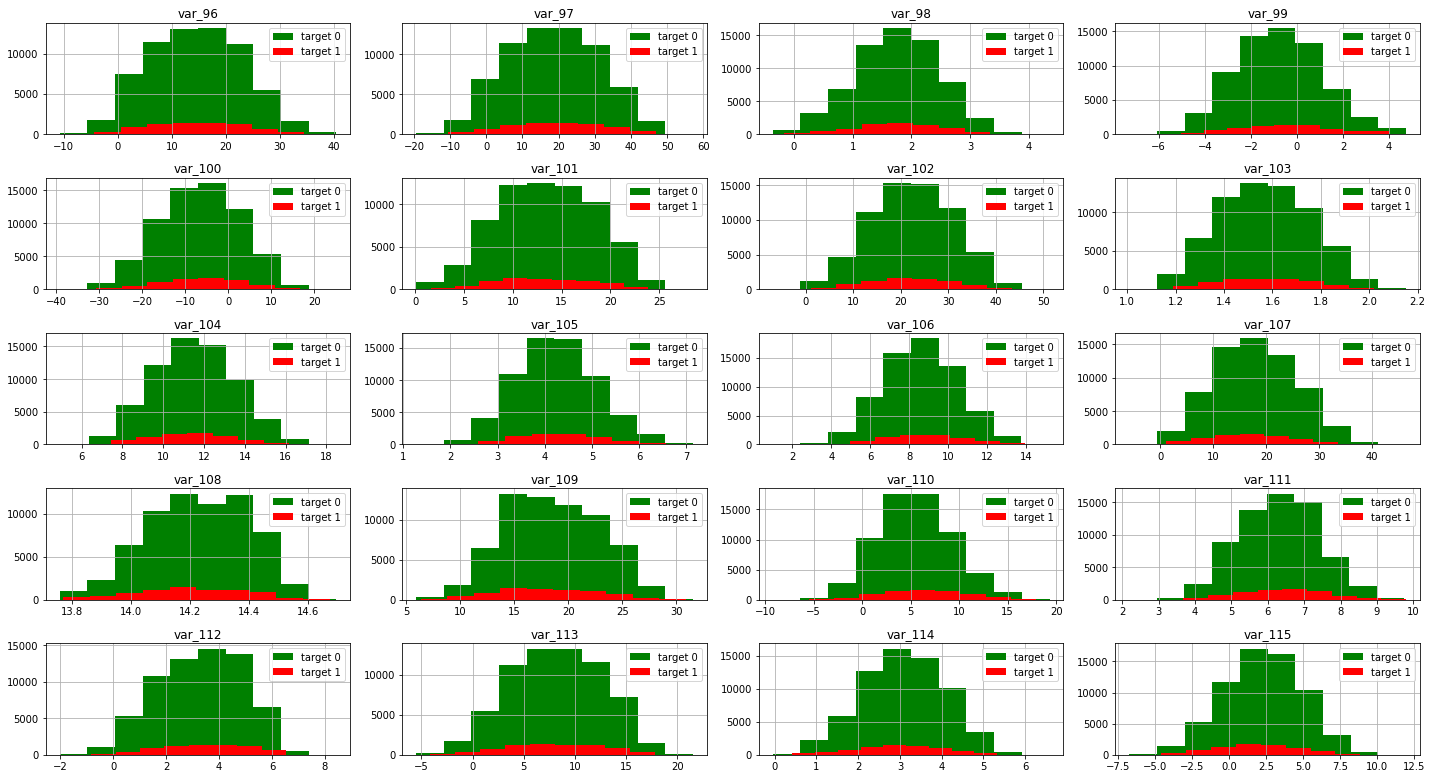

In [ ]:
#Variables 96 to 115
plt.figure(figsize=(20,15))
for i, col in enumerate(list(train.columns)[98:118]):
    plt.subplot(7,4,i + 1)
    plt.hist(t0[col],label='target 0',color='green')
    plt.hist(t1[col],label='target 1',color='red')
    plt.title(col)
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



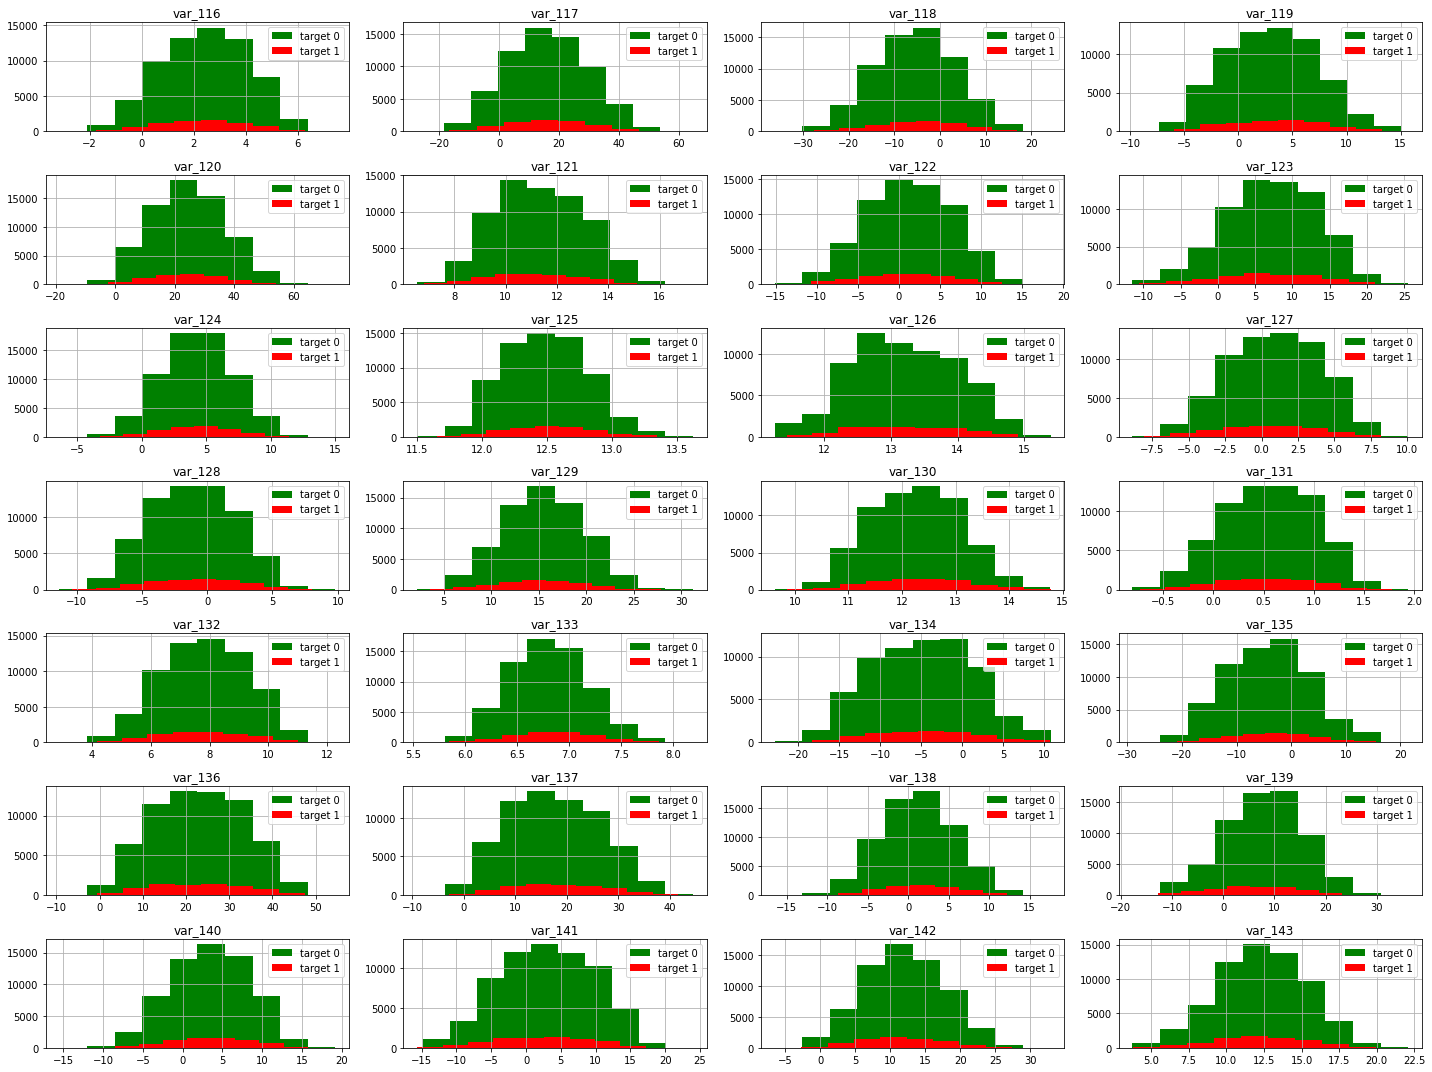

In [ ]:
#Variables 116 to 143
plt.figure(figsize=(20,15))
for i, col in enumerate(list(train.columns)[118:146]):
    plt.subplot(7,4,i + 1)
    plt.hist(t0[col],label='target 0',color='green')
    plt.hist(t1[col],label='target 1',color='red')
    plt.title(col)
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



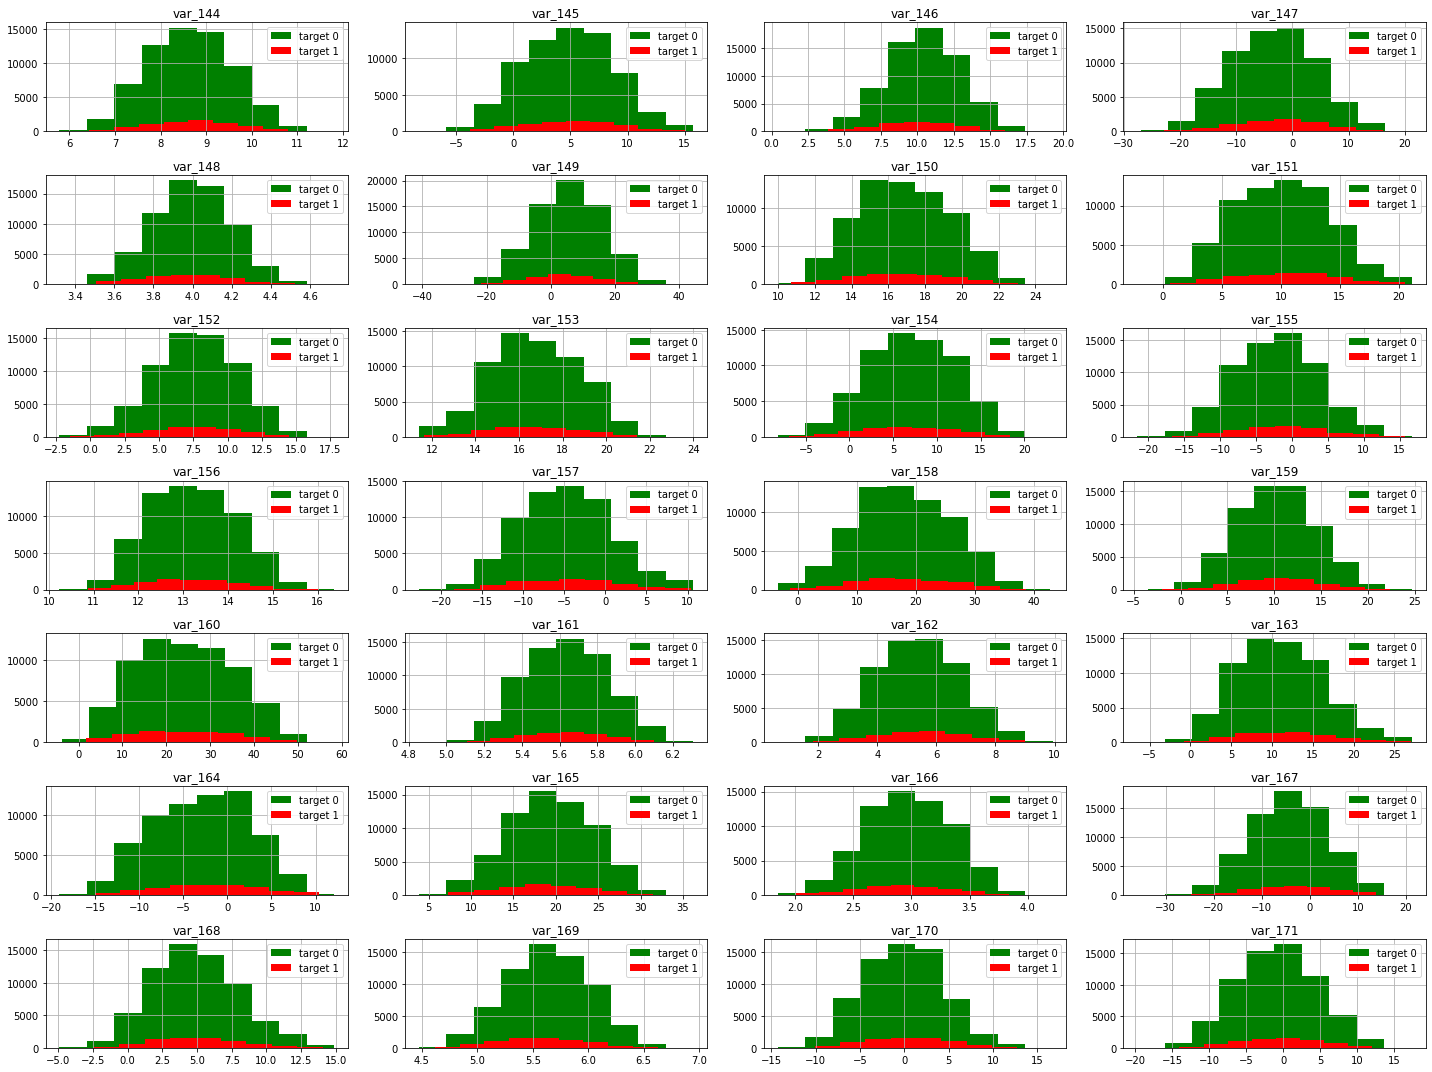

In [ ]:
#Variables 144 to 171
plt.figure(figsize=(20,15))
for i, col in enumerate(list(train.columns)[146:174]):
    plt.subplot(7,4,i + 1)
    plt.hist(t0[col],label='target 0',color='green')
    plt.hist(t1[col],label='target 1',color='red')
    plt.title(col)
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



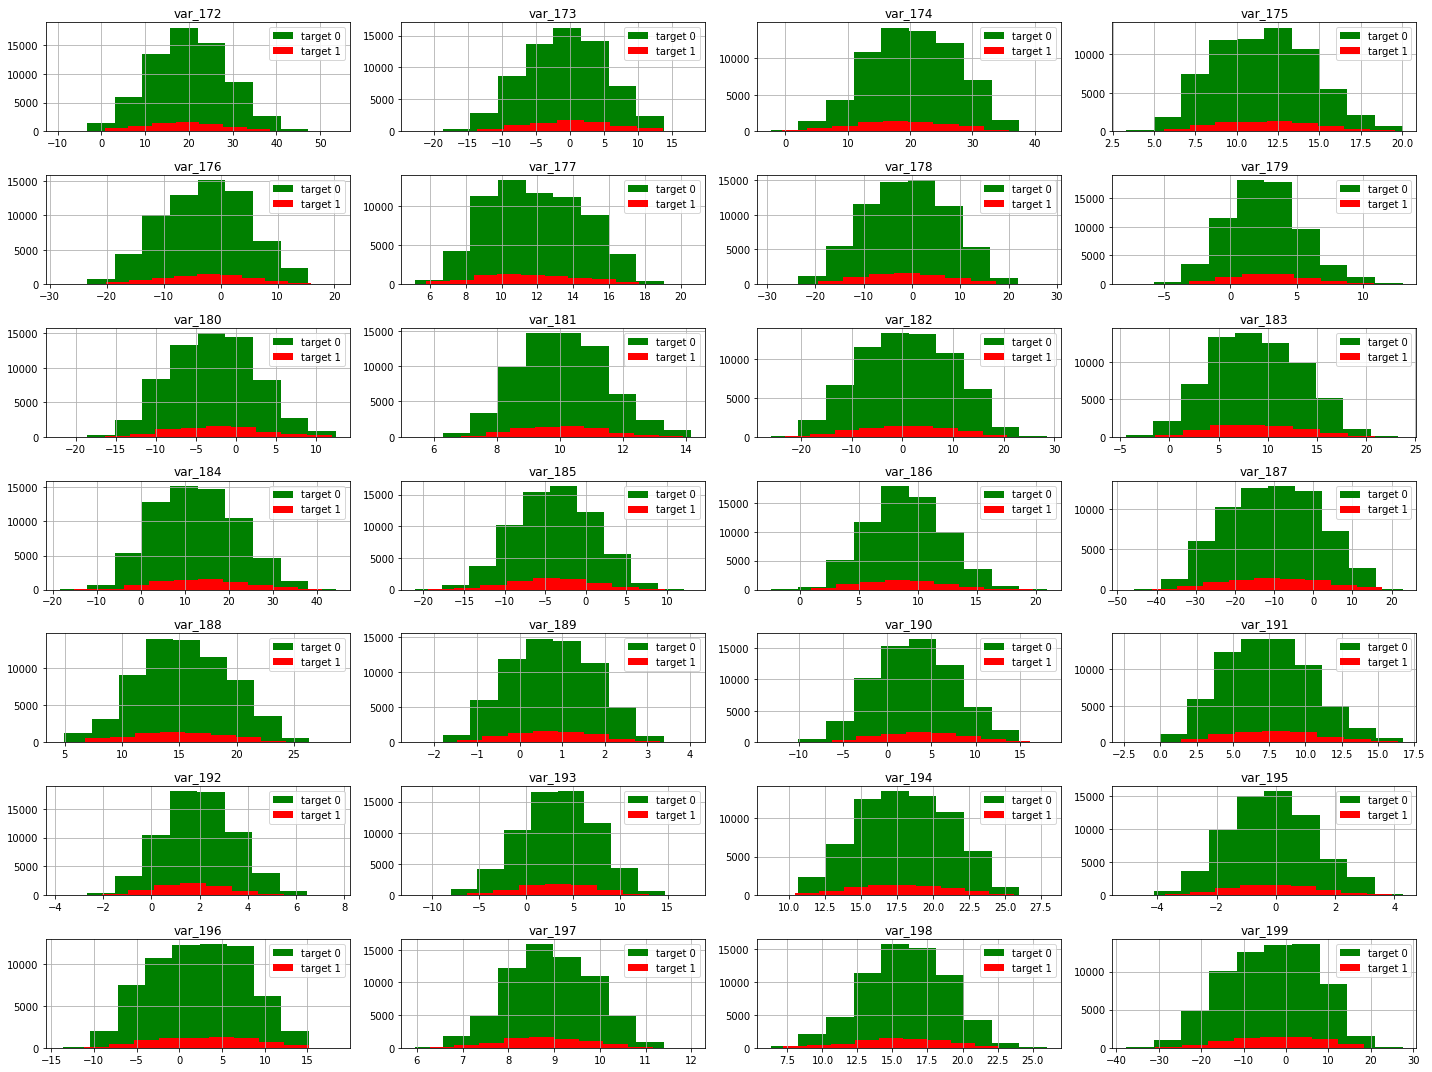

In [ ]:
#Variables 172 to 199
plt.figure(figsize=(20,15))
for i, col in enumerate(list(train.columns)[174:203]):
    plt.subplot(7,4,i + 1)
    plt.hist(t0[col],label='target 0',color='green')
    plt.hist(t1[col],label='target 1',color='red')
    plt.title(col)
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

In [ ]:
# Rows containing duplicate data
print(df.shape)

duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

(400000, 202)
number of duplicate rows:  (0, 202)


In [ ]:
df.dtypes

target     float64
var_0      float64
var_1      float64
var_2      float64
var_3      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 201, dtype: object

In [ ]:
df.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0.0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0.0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0.0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0.0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0.0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [ ]:
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,...,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000
mean,0.100490,10.669326,-1.625933,10.711322,6.792372,11.077366,-5.057938,5.412056,16.537496,0.280648,...,3.212103,7.448339,1.926891,3.326895,17.995376,-0.137873,2.297117,8.910293,15.869952,-3.286439
std,0.300653,3.038398,4.045275,2.637393,2.048028,1.619805,7.866274,0.865652,3.421286,3.333002,...,4.555632,3.024243,1.479193,3.993813,3.137905,1.429530,5.450356,0.921266,3.009828,10.418385
min,0.000000,0.188700,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.216400,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-39.457800
25%,0.000000,8.448900,-4.720800,8.729700,5.242175,9.886975,-11.200825,4.770200,13.938200,-2.310825,...,-0.077200,5.161900,0.886700,0.586075,15.632400,-1.165900,-1.947800,8.255800,13.838500,-11.171300
50%,0.000000,10.518950,-1.599400,10.570000,6.823700,11.104500,-4.833700,5.388500,16.439800,0.383100,...,3.181700,7.363700,1.897000,3.410900,17.967100,-0.167600,2.406800,8.890600,15.939200,-2.769700
75%,0.000000,12.748225,1.350025,12.505300,8.326000,12.256800,0.934700,6.004300,19.099000,2.934025,...,6.373200,9.521700,2.952800,6.191400,20.393800,0.834000,6.539300,9.594900,18.055325,4.889400
max,1.000000,22.323400,10.376800,19.353000,13.188300,16.671400,17.253700,8.447700,28.292800,10.151300,...,20.359000,16.716500,8.402400,18.281800,27.947800,4.545400,18.321500,12.275800,26.538400,28.500700


## No Nulls
Except the target of test set.

In [14]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataset has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
missing_values_table(df)

Dataset has 202 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
target,200000,50.0


### Target

The dataset is very unbalaced so we will use oversampling to improve our score.

In [ ]:
df.target.value_counts()

0.0    179902
1.0     20098
Name: target, dtype: int64

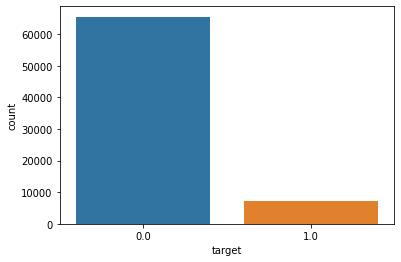

In [ ]:
#Distribution of train target variable
sns.countplot(train['target'])

# Modeling

In [15]:
train = df.iloc[0:len(train), ]
test = df.iloc[len(train)::, ]

X = train.drop(columns=['target','ID_code'])
y = train.target

# splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

By testing feature scaling, we concluded that it was not improving our model.

In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()

#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

### PCA

By testing PCA, we concluded that it was not improving our model.

In [ ]:
#from sklearn.decomposition import PCA

#pca = PCA(n_components = 200)
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)

### Sampling

#### Oversampling

In [ ]:
X_over = pd.concat([X_train, Y_train], axis=1)

class_1 = X_over[X_over.target_status == 1]
class_2 = X_over[X_over.target_status == 0]

oversampled = resample(class_1, replace=True, n_samples=len(class_2),
                       random_state=666)

oversampled = pd.concat([class_1, oversampled])
oversampled.target_status.value_counts()
y_train_over = oversampled.target_status
X_train_over = oversampled.drop('target_status', axis=1)

#### SMOTE - Oversampling

In [16]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=0)
X_sm, y_sm = sm.fit_resample(X, y)

# splitting dataset
from sklearn.model_selection import train_test_split
Xsm_train, Xsm_test, ysm_train, ysm_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 0)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



#### Undersampling

In [ ]:
undersampled = resample(class_2, replace=True,
                        n_samples=len(class_1), random_state=666)

undersampled = pd.concat([undersampled, class_1])
undersampled.target_status.value_counts()

y_train_under = undersampled.target_status
X_train_under = undersampled.drop('target_status', axis=1)
undersampled = RandomUnderSampler(random_state=666)
X_train_random_under, y_train_random_under = undersampled.fit_resample(X_train_under.values, y_train_under.values)

#### Undersampling - Tomek Link

In [ ]:
X_train_TL, y_train_TL = NearMiss().fit_resample(X_train, Y_train.values)

### LogisticRegression


In [ ]:
model_lr = LogisticRegression(max_iter=100,random_state=0, solver= 'liblinear') # penalty='none'
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
print("model_lr = ", accuracy_score(y_test, y_pred))
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

model_lr =  0.9025


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.5364449154242595

In [ ]:
model_lr_SM = LogisticRegression(max_iter=100, penalty='none' ,random_state=0) 
model_lr_SM.fit(Xsm_train, ysm_train)
ysm_pred = model_lr_SM.predict(Xsm_test)
print("model_lr = ", accuracy_score(ysm_test, ysm_pred))
roc_auc = roc_auc_score(ysm_test,ysm_pred)
roc_auc

model_lr =  0.7904003557482525


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.7904299958392892

### RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
C = LogisticRegression()
param = [0.0001, 0.001, 0.01, 0.1, 1, 5, 12, 20,30, 40]
parameters = {'C': param}

model_lr_SM2 = RandomizedSearchCV(C, parameters, cv=3, scoring='roc_auc', return_train_score=True, n_jobs=-1)
model_lr_SM2.fit(Xsm_train, ysm_train)

ysm_pred2 = model_lr_SM2.predict(Xsm_test)
print("model_lr2 = ", accuracy_score(ysm_test, ysm_pred2))
roc_auc = roc_auc_score(ysm_test,ysm_pred2)
roc_auc


model_lr2 =  0.792526507413738


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.7925402156215937

### Feature Importance

In [ ]:
print ("FEATURE IMPORTANCE...")

list_inputs = [c for c in train.columns if c != 'target']

from sklearn.ensemble import RandomForestClassifier
print ("STEP 2.1: FEATURE IMPORTANCE WITH RANDOM FOREST...")
# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_estimators=20,random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
Feat = []
for f in range(202):
    print("%d. feature %s (%f) " % (f + 1, list_inputs[indices[f]], importances[indices[f]] ))
    Feat.append(list_inputs[indices[f]])

STEP 3: FEATURE IMPORTANCE...
STEP 2.1: FEATURE IMPORTANCE WITH RANDOM FOREST...
Feature ranking:
1. feature var_81 (0.019058) 
2. feature var_12 (0.016067) 
3. feature var_53 (0.014778) 
4. feature var_26 (0.014436) 
5. feature var_22 (0.014309) 
6. feature var_76 (0.013805) 
7. feature var_6 (0.013706) 
8. feature var_80 (0.013634) 
9. feature var_2 (0.012847) 
10. feature var_99 (0.012828) 
11. feature var_13 (0.012509) 
12. feature var_21 (0.012239) 
13. feature var_44 (0.012198) 
14. feature var_0 (0.012160) 
15. feature var_40 (0.012088) 
16. feature var_94 (0.012049) 
17. feature var_78 (0.011977) 
18. feature var_1 (0.011922) 
19. feature var_34 (0.011843) 
20. feature var_92 (0.011696) 
21. feature var_33 (0.011593) 
22. feature var_9 (0.011544) 
23. feature var_18 (0.011334) 
24. feature var_91 (0.011222) 
25. feature var_86 (0.011016) 
26. feature var_67 (0.010983) 
27. feature var_75 (0.010922) 
28. feature var_95 (0.010895) 
29. feature var_89 (0.010647) 
30. feature var_5

IndexError: index 100 is out of bounds for axis 0 with size 100

In [ ]:
topFeat = Feat[:100]

X2 = train[topFeat]
y = train.target

# splitting dataset
from sklearn.model_selection import train_test_split
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2, random_state = 0)

In [ ]:
model_lr2 = LogisticRegression(max_iter=100, penalty='none',random_state=0)
model_lr2.fit(X2_train, y_train)
y_pred = model_lr2.predict(X2_test)
print("model_lr = ", accuracy_score(y_test, y_pred))

model_lr =  0.90255


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### DecisionTreeClassifier



In [ ]:
model_DTC = DecisionTreeClassifier(min_samples_split=20, random_state=0)
#model_DTC.fit(X_train, y_train)
#y_pred = model_DTC.predict(X_test)
print("model_DTC = ", accuracy_score(y_test, y_pred))
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

model_DTC =  0.902475


0.5368737000667729

### KNN Classifier



In [ ]:
model_KNN = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2)
model_KNN.fit(X_train, y_train)
y_pred = model_KNN.predict(X_test)
print("model_KNN = ", accuracy_score(y_test, y_pred))
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

model_KNN =  0.897675


0.5014477547889894

### GaussianNB



In [ ]:
model_GNB = GaussianNB(priors=None)
model_GNB.fit(Xsm_train, ysm_train)
y_pred = model_GNB.predict(Xsm_test)
print("model_GNB = ", accuracy_score(ysm_test, y_pred))
roc_auc = roc_auc_score(ysm_test,y_pred)
roc_auc

model_GNB =  0.8646766998791012


0.8644304094694393

### XGBoost


In [ ]:
model_XGC = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    subsample=1) #silent=True



model_XGC.fit(X_train, y_train)
y_pred = model_XGC.predict(X_test)
print("model_XGC = ", accuracy_score(y_test, y_pred))
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

model_XGC =  0.877375


0.5782586975154015

### Support Vector Machine
accuracy_score =

In [ ]:
model_SVC = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
               decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
               max_iter=-1, probability=True, random_state=None, shrinking=True,
               tol=0.001, verbose=False)

model_SVC.fit(X_train, y_train)
y_pred = model_SVC.predict(X_test)
print("model_SVC = ", accuracy_score(y_test, y_pred))
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

### RandomForestClassifier


In [ ]:
model_RFC = RandomForestClassifier(n_jobs=2, n_estimators = 450, random_state=0, criterion='entropy')
model_RFC.fit(Xsm_train, ysm_train)
ysm_pred = model_RFC.predict(Xsm_test)
print("model_RFC = ", accuracy_score(ysm_test, ysm_pred))
roc_auc = roc_auc_score(ysm_test,ysm_pred)
roc_auc

model_RFC =  0.9720821000264032


0.9720284314262265

### Feature Selection With Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier())
sel.fit(df, y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap='True',
                                                 ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='entropy',
                                                 max_depth=None,
                                                 max_features='log2',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=20000, n_jobs=5,
            

In [ ]:
sel.get_support()

In [ ]:
selected_feat= df.columns[(sel.get_support())]
len(selected_feat)

In [ ]:
X_train_sel=X[selected_feat]
X_test_sel=X_test[selected_feat]

In [ ]:
model_RFC = RandomForestClassifier(n_jobs=2, n_estimators = 450, random_state=0, criterion='entropy')
model_RFC.fit(X_train_sel, y_train)
ysm_pred = model_RFC.predict(X_test_sel)
print("model_RFC = ", accuracy_score(y_test, ysm_pred))
roc_auc = roc_auc_score(ysm_test,ysm_pred)
roc_auc

### Neural Net

In [ ]:
classes=1
model = Sequential()
model.add(Dense(16,activation='relu', input_shape=(200,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(classes,activation='sigmoid'))
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history=model.fit(Xsm_train,ysm_train,batch_size=2048,epochs=20,validation_data=(Xsm_test,ysm_test))

Train on 287843 samples, validate on 71961 samples
Epoch 1/20
287843/287843 [==============================] - 1s 5us/step - loss: 0.8398 - accuracy: 0.5570 - val_loss: 0.6575 - val_accuracy: 0.6099
Epoch 2/20
287843/287843 [==============================] - 1s 4us/step - loss: 0.5994 - accuracy: 0.6752 - val_loss: 0.5434 - val_accuracy: 0.7280
Epoch 3/20
287843/287843 [==============================] - 1s 4us/step - loss: 0.5149 - accuracy: 0.7464 - val_loss: 0.4884 - val_accuracy: 0.7637
Epoch 4/20
287843/287843 [==============================] - 1s 4us/step - loss: 0.4835 - accuracy: 0.7676 - val_loss: 0.4693 - val_accuracy: 0.7780
Epoch 5/20
287843/287843 [==============================] - 1s 4us/step - loss: 0.4692 - accuracy: 0.7770 - val_loss: 0.4576 - val_accuracy: 0.7859
Epoch 6/20
287843/287843 [==============================] - 1s 4us/step - loss: 0.4591 - accuracy: 0.7837 - val_loss: 0.4490 - val_accuracy: 0.7919
Epoch 7/20
287843/287843 [==============================] - 1

In [ ]:
ypred = model.predict(Xsm_test)
roc_auc = roc_auc_score(ysm_test,y_pred)
roc_auc

### LGBMClassifier



In [ ]:
model_LGBM = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                        learning_rate=0.5, max_depth=7, min_child_samples=20,
                        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
                        n_jobs=-1, num_leaves=500, objective='binary', random_state=None,
                        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
                        subsample_for_bin=200000, subsample_freq=0)

model_LGBM.fit(X_train, y_train)
y_pred = model_LGBM.predict(X_test)
print("model_LGBM = ", accuracy_score(y_test, y_pred))
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

model_LGBM =  0.88945


0.5796574934430987

### LGBMClassifier SMOTE

In [ ]:
model_LGBM_SM = LGBMClassifier(bagging_freq = 5, bagging_fraction = 0.4, boost_from_average = False, boost = 'gbdt',
feature_fraction = 0.05, learning_rate = 0.01, max_depth = -1, metric = 'auc', min_data_in_leaf = 80,
min_sum_hessian_in_leaf = 10, num_leaves = 13, num_threads = 8, tree_learner = 'serial', objective = 'binary',
verbosity = 1)

model_LGBM_SM.fit(Xsm_train, ysm_train)
ysm_pred = model_LGBM_SM.predict(Xsm_test)
print("model_LGBM = ", accuracy_score(ysm_test, ysm_pred))
roc_auc = roc_auc_score(ysm_test,ysm_pred)
roc_auc

model_LGBM =  0.8325759786551048


0.8323757884448167

In [ ]:
# set default parameters for 1st round training
params = {'boosting': 'gbdt','objective':'regression','metric': 'rmse','learning_rate': 0.01, 
          'num_leaves': 110, 'max_bin': 66,  'max_depth': 10, 'min_data_in_leaf': 30, 
          'min_child_samples': 20,'feature_fraction': 0.5,'bagging_fraction': 0.8,'bagging_freq': 40,  
          'bagging_seed': 11,'lambda_l1': 2,'lambda_l2': 0.1 }

In [ ]:
train_model = train.drop(columns=['target', 'ID_code'])
test_model = test.drop(columns=['target', 'ID_code'])

### Lgb

The below code is commented as it was not working as expected.

In [ ]:
#rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=0)
#for fold_, (train_index, test_index) in enumerate(rkf.split(train.values, train.target)):
  #predictions = np.zeros(len(test))
  #train_data = lgb.Dataset(train_model.iloc[train_index], label=train.target.iloc[train_index]) 
  #validation_data = lgb.Dataset(train_model.iloc[test_index], label=train.target.iloc[test_index])
  
  #iteration = 2000
  #model = lgb.train(params, train_data, iteration, valid_sets=[validation_data], verbose_eval=100,early_stopping_rounds=100) 
  
  #predictions = model.predict(test_model, num_iteration=model.best_iteration) / (5*2)

TRAIN: [    0     1     2 ... 72906 72908 72909] TEST: [    3    14    17 ... 72905 72907 72910]
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 0.291747
[200]	valid_0's rmse: 0.285526
[300]	valid_0's rmse: 0.281068
[400]	valid_0's rmse: 0.277726
[500]	valid_0's rmse: 0.275079
[600]	valid_0's rmse: 0.27291
[700]	valid_0's rmse: 0.271144
[800]	valid_0's rmse: 0.269734
[900]	valid_0's rmse: 0.268572
[1000]	valid_0's rmse: 0.267497
[1100]	valid_0's rmse: 0.266586
[1200]	valid_0's rmse: 0.265888
[1300]	valid_0's rmse: 0.265267
[1400]	valid_0's rmse: 0.264738
[1500]	valid_0's rmse: 0.264234
[1600]	valid_0's rmse: 0.263807
[1700]	valid_0's rmse: 0.263483
[1800]	valid_0's rmse: 0.263198
[1900]	valid_0's rmse: 0.262981
[2000]	valid_0's rmse: 0.26274
Did not meet early stopping. Best iteration is:
[2000]	valid_0's rmse: 0.26274
TRAIN: [    1     2     3 ... 72907 72908 72910] TEST: [    0     6    11 ... 72900 72902 72909]
Training until validation scores do

In [ ]:
# Reference: code from Ashish Patel

nfolds = 5
nrepeats = 2 
folds = RepeatedKFold(n_splits=nfolds, n_repeats=nrepeats, random_state=0)
fold_pred = np.zeros(len(train))
feature_importance_df = pd.DataFrame()
lgb_preds = np.zeros(len(test))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values,target.values)):
    print("fold n°{}".format(fold_))
    trn_data = lgb.Dataset(train.iloc[trn_idx], label=target.iloc[trn_idx]) #categorical_feature=categorical_feats
    val_data = lgb.Dataset(train.iloc[val_idx], label=target.iloc[val_idx]) #categorical_feature=categorical_feats

    iteration = 2000
    lgb_m = lgb.train(params, trn_data, iteration, valid_sets = [trn_data, val_data], verbose_eval=100, early_stopping_rounds = 100)
    fold_pred[val_idx] = lgb_m.predict(train.iloc[val_idx], num_iteration=lgb_m.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = train.columns
    fold_importance_df["importance"] = lgb_m.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    lgb_preds += lgb_m.predict(test, num_iteration=lgb_m.best_iteration) / (nfolds*nrepeats)

print("CV score: {:<8.5f}".format(np.sqrt(mean_squared_error(fold_pred, target))))

fold n°0
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 0.286251	valid_1's rmse: 0.290854
[200]	training's rmse: 0.275598	valid_1's rmse: 0.284767
[300]	training's rmse: 0.266852	valid_1's rmse: 0.280309
[400]	training's rmse: 0.259484	valid_1's rmse: 0.276974
[500]	training's rmse: 0.253004	valid_1's rmse: 0.274199
[600]	training's rmse: 0.247194	valid_1's rmse: 0.271918
[700]	training's rmse: 0.241934	valid_1's rmse: 0.269938
[800]	training's rmse: 0.237153	valid_1's rmse: 0.268346
[900]	training's rmse: 0.232755	valid_1's rmse: 0.266906
[1000]	training's rmse: 0.228657	valid_1's rmse: 0.265735
[1100]	training's rmse: 0.224813	valid_1's rmse: 0.264664
[1200]	training's rmse: 0.221231	valid_1's rmse: 0.263744
[1300]	training's rmse: 0.217849	valid_1's rmse: 0.262908
[1400]	training's rmse: 0.214686	valid_1's rmse: 0.262209
[1500]	training's rmse: 0.211713	valid_1's rmse: 0.261583
[1600]	training's rmse: 0.208899	valid_1's rmse: 0.261016
[1700]	tr

In [ ]:
# ranking all feature by avg importance score from Kfold, select top100
all_features = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)
all_features.reset_index(inplace=True)
important_features = list(all_features[0:100]['feature'])
all_features[0:50]

,feature,importance
0,var_6,2301.4
1,var_146,2241.7
2,var_139,2217.2
3,var_76,2195.7
4,var_12,2193.8
5,var_22,2156.4
6,var_81,2147.4
7,var_110,2119.4
8,var_174,2097.0
9,var_21,2034.5


## Reference: Santander Customer Prediction Fake + LGBM notebook

Based on research this is the model that gave us the best result.

In [ ]:
unique_samples = []
unique_count = np.zeros_like(test_X)
for feature in range(test_X.shape[1]):
    _, index_, count_ = np.unique(test_X[:, feature], return_index=True, return_counts=True)
    unique_count[index_[count_ == 1], feature] += 1

real_sample_index = np.argwhere(np.sum(unique_count, axis=1) > 0)[:, 0]
synthetic_sample_index = np.argwhere(np.sum(unique_count, axis=1) == 0)[:, 0]

test_X_real = test_X[real_sample_index].copy()

In [ ]:
print('There are ' + str(len(real_sample_index)) + ' real data samples in test set')
print('There are ' + str(len(synthetic_sample_index)) + ' synthetic data samples in test set')

In [ ]:
generator_for_each_synthetic_sample = []
for cur_sample_index in synthetic_sample_index[:20000]:
    cur_synthetic_sample = test_X[cur_sample_index]
    potential_generators = test_X_real == cur_synthetic_sample

    features_mask = np.sum(potential_generators, axis=0) == 1
    verified_generators_mask = np.any(potential_generators[:, features_mask], axis=1)
    verified_generators_for_sample = real_sample_index[np.argwhere(verified_generators_mask)[:, 0]]
    generator_for_each_synthetic_sample.append(set(verified_generators_for_sample))

In [ ]:
gen = generator_for_each_synthetic_sample[0]
for x in generator_for_each_synthetic_sample:
    if gen.intersection(x):
        gen = gen.union(x)

LB = generator_for_each_synthetic_sample[1]
for x in generator_for_each_synthetic_sample:
    if LB.intersection(x):
        LB = LB.union(x)

LB = list(LB)
gen = list(gen)
full = np.concatenate([train_X, np.concatenate([test_X[LB], test_X[gen]])])

In [ ]:
print('There are ' + str(len(LB)) + ' data samples for public score in real data set')
print('There are ' + str(len(gen)) + ' data samples for private score in real data set')

In [ ]:
full = pd.DataFrame(full)
full.columns = train_X_column_name
train_X = pd.DataFrame(train_X)
train_X.columns = train_X_column_name
test_X = pd.DataFrame(test_X)
test_X .columns = train_X_column_name

for feat in ['var_' + str(x) for x in range(200)]:
    count_values = full.groupby(feat)[feat].count()
    train_X['new_' + feat] = count_values.loc[train_X[feat]].values
    test_X['new_' + feat] = count_values.loc[test_X[feat]].values

In [ ]:
param = {
    'num_leaves': 8,
    'min_data_in_leaf': 17,
    'learning_rate': 0.01,
    'min_sum_hessian_in_leaf': 9.67,
    'bagging_fraction': 0.8329,
    'bagging_freq': 2,
    'feature_fraction': 1,
    'lambda_l1': 0.6426,
    'lambda_l2': 0.3067,
    'min_gain_to_split': 0.02832,
    'max_depth': -1,
    'seed': seed,
    'feature_fraction_seed': seed,
    'bagging_seed': seed,
    'drop_seed': seed,
    'data_random_seed': seed,
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'verbosity': -1,
    'metric': 'auc',
    'is_unbalance': True,
    'save_binary': True,
    'boost_from_average': 'false',
    'num_threads': 8
}

In [ ]:
iterations = 110
test_hat = np.zeros([200000, 200])
i = 0
for feature in ['var_' + str(x) for x in range(200)]:  # loop over all features
    # print(feature)
    feat_choices = [feature, 'new_' + feature]
    lgb_train = lgb.Dataset(train_X[feat_choices], train_y)
    gbm = lgb.train(param, lgb_train, iterations, verbose_eval=-1)
    test_hat[:, i] = gbm.predict(test_X[feat_choices], num_iteration=gbm.best_iteration)
    i += 1

sub_preds = test_hat.sum(axis=1)

# Submission

In [ ]:
test_sub = test.drop(columns=['ID_code', 'target'])

In [ ]:
sub = pd.DataFrame()
sub['ID_code'] = test['ID_code']
#sub['target'] = model_LGBM_SM_150.predict(test_sub).astype('int64')
sub['target'] = sub_preds
sub.to_csv('submission_model_lgb.csv', index=False)